In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

zip_path = '/content/drive/MyDrive/parking-lot-detection.zip'

# 압축 파일 풀기
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/parking-lot-detection')

In [ ]:
import os

# 디렉토리 내용 확인
extracted_files = os.listdir('/content/drive/MyDrive/parking-lot-detection')
print(extracted_files)

['test', 'train', 'valid', 'README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'Untitled']


In [ ]:
!mkdir -p /content/drive/MyDrive/yolov5
!git clone https://github.com/ultralytics/yolov5.git /content/drive/MyDrive/yolov5

Cloning into '/content/drive/MyDrive/yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 13.10 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
Updating files: 100% (146/146), done.


In [ ]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [ ]:
!pip install -U -r requirements.txt

In [ ]:
!python /content/drive/MyDrive/yolov5/train.py \
  --img 320 \
  --batch 16 \
  --epochs 50 \
  --data /content/drive/MyDrive/parking-lot-detection/data.yaml \
  --weights yolov5s.pt \
  --project /content/drive/MyDrive/yolov5_runs \
  --name exp_full_data_test1 \
  --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      45/49      1.33G    0.05112    0.07318   0.002743       1327        320:  44% 239/544 [00:22<00:28, 10.76it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      45/49      1.33G    0.05109    0.07313   0.002741       1037        320:  44% 241/544 [00:22<00:27, 10.96it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      45/49      1.33G     0.0511    0.07315   0.002741       1209        320:  44% 241/544 [00:22<00:27, 10.96it/s]/content/drive/MyDrive/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)

In [ ]:
!python detect.py \
  --weights /content/drive/MyDrive/yolov5_runs/exp_full_data_test12/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/drive/MyDrive/parking-lot-detection/train/images \
  --save-txt \
  --save-conf \
  --project yolo_preds \
  --name full_train_preds \
  --exist-ok


Streaming output truncated to the last 5000 lines.
image 3694/8690 /content/drive/MyDrive/parking-lot-detection/train/images/2012-12-16_15_25_12_jpg.rf.ba90e55778d1e542ed9bece47756a8d1.jpg: 640x640 1 space-empty, 28 space-occupieds, 6.9ms
image 3695/8690 /content/drive/MyDrive/parking-lot-detection/train/images/2012-12-16_15_40_12_jpg.rf.d86769e165f84b952828f2f9ed08b36a.jpg: 640x640 1 space-empty, 29 space-occupieds, 7.1ms
image 3696/8690 /content/drive/MyDrive/parking-lot-detection/train/images/2012-12-16_15_45_12_jpg.rf.1b39cd806b21e0951ba5540f3981ed7b.jpg: 640x640 1 space-empty, 27 space-occupieds, 7.3ms
image 3697/8690 /content/drive/MyDrive/parking-lot-detection/train/images/2012-12-16_15_50_12_jpg.rf.882a5c3e30c663d4436253d86d719fe5.jpg: 640x640 1 space-empty, 27 space-occupieds, 7.1ms
image 3698/8690 /content/drive/MyDrive/parking-lot-detection/train/images/2012-12-16_15_55_12_jpg.rf.52ab24f07aa201679dd6b8e81ff9f45f.jpg: 640x640 29 space-occupieds, 7.0ms
image 3699/8690 /content

In [22]:
import pandas as pd
import glob

# YOLO 예측 결과 불러와서 Pandas DataFrame으로 정리하기

yolo_output_labels_folder = "/content/drive/MyDrive/yolov5/yolo_preds/full_train_preds/labels/"


def parse_yolo_detections_to_df(detections_folder_path):
    detection_files = glob.glob(os.path.join(detections_folder_path, '*.txt'))

    if not detection_files:
        print(f"경고: '{detections_folder_path}' 폴더에 .txt 파일이 없습니다.")
        print("1. detect.py를 제대로 실행했는지 확인해주세요.")
        print("2. 위 'yolo_output_labels_folder' 경로가 올바른지 확인해주세요.")
        return pd.DataFrame()

    all_detections_list = []
    for file_path in detection_files:
        image_filename = os.path.splitext(os.path.basename(file_path))[0]
        try:
            with open(file_path, 'r') as f:
                for line_number, line in enumerate(f, 1):
                    parts = line.strip().split()
                    if len(parts) == 6: # class_id, x_center, y_center, width, height, confidence
                        all_detections_list.append({
                            'image_id': image_filename,
                            'line_in_file': line_number,
                            'class_id': int(parts[0]),
                            'x_center': float(parts[1]),
                            'y_center': float(parts[2]),
                            'width': float(parts[3]),
                            'height': float(parts[4]),
                            'confidence': float(parts[5])
                        })
                    else:
                        print(f"주의: '{file_path}' 파일의 {line_number}번째 줄 형식이 다릅니다: {line.strip()}")
        except Exception as e:
            print(f"오류: '{file_path}' 파일 처리 중 문제가 발생했습니다: {e}")

    df = pd.DataFrame(all_detections_list)
    return df

# 코드 실행
yolo_detections_df = parse_yolo_detections_to_df(yolo_output_labels_folder)

if not yolo_detections_df.empty:
    print(f"\n총 {len(yolo_detections_df)}개의 YOLO 예측을 성공적으로 DataFrame으로 불러왔습니다.")
    print("불러온 예측 결과 DataFrame (처음 5개 샘플):")
    print(yolo_detections_df.head())
else:
    print("\nYOLO 예측 결과를 DataFrame으로 불러오지 못했습니다.")


총 738381개의 YOLO 예측을 성공적으로 DataFrame으로 불러왔습니다.
불러온 예측 결과 DataFrame (처음 5개 샘플):
                                            image_id  line_in_file  class_id  \
0  2013-03-19_15_35_11_jpg.rf.3924c1006ac6413328b...             1         1   
1  2013-03-19_15_35_11_jpg.rf.3924c1006ac6413328b...             2         1   
2  2013-03-19_15_35_11_jpg.rf.3924c1006ac6413328b...             3         1   
3  2013-03-19_15_35_11_jpg.rf.3924c1006ac6413328b...             4         1   
4  2013-03-19_15_35_11_jpg.rf.3924c1006ac6413328b...             5         1   

   x_center  y_center     width    height  confidence  
0  0.530048  0.943510  0.084135  0.103365    0.280640  
1  0.849760  0.117788  0.045673  0.081731    0.758288  
2  0.566106  0.015625  0.055288  0.031250    0.798091  
3  0.724760  0.019231  0.045673  0.038462    0.802362  
4  0.290865  0.032452  0.062500  0.045673    0.826784  


In [23]:
import numpy as np


# IoU 계산 함수
def calculate_iou(box1, box2):
    """
    두 개의 바운딩 박스(YOLO 형식: [x_center, y_center, width, height])간의 IoU를 계산합니다.
    box1: [xc1, yc1, w1, h1]
    box2: [xc2, yc2, w2, h2]
    """
    # YOLO 형식을 [xmin, ymin, xmax, ymax]로 변환
    def yolo_to_minmax(box):
        xc, yc, w, h = box
        xmin = xc - w / 2
        ymin = yc - h / 2
        xmax = xc + w / 2
        ymax = yc + h / 2
        return [xmin, ymin, xmax, ymax]

    box1_minmax = yolo_to_minmax(box1)
    box2_minmax = yolo_to_minmax(box2)

    # 교차 영역 좌표
    inter_xmin = max(box1_minmax[0], box2_minmax[0])
    inter_ymin = max(box1_minmax[1], box2_minmax[1])
    inter_xmax = min(box1_minmax[2], box2_minmax[2])
    inter_ymax = min(box1_minmax[3], box2_minmax[3])

    inter_width = max(0, inter_xmax - inter_xmin)
    inter_height = max(0, inter_ymax - inter_ymin)
    intersection_area = inter_width * inter_height

    # 각 박스 면적
    box1_area = box1[2] * box1[3] # w1 * h1
    box2_area = box2[2] * box2[3] # w2 * h2

    # 합집합 면적
    union_area = box1_area + box2_area - intersection_area

    if union_area == 0:
        return 0.0

    iou = intersection_area / union_area
    return iou

def load_ground_truth_for_image(gt_labels_folder, image_id):
    """
    주어진 image_id에 해당하는 원본 정답 .txt 파일을 로드합니다.
    반환값: [[class_id, x_center, y_center, width, height], ...] 형태의 리스트
    """
    gt_file_path = os.path.join(gt_labels_folder, image_id + ".txt")
    ground_truths = []
    if os.path.exists(gt_file_path):
        with open(gt_file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    ground_truths.append([
                        int(parts[0]),
                        float(parts[1]),
                        float(parts[2]),
                        float(parts[3]),
                        float(parts[4])
                    ])
    return ground_truths

In [24]:
ground_truth_labels_folder = "/content/drive/MyDrive/parking-lot-detection/train/labels/"
iou_threshold = 0.5
correctness_labels = []
print(f"총 {len(yolo_detections_df)}개의 YOLO 예측에 대해 정탐/오탐 레이블링을 시작합니다...")
for index, pred_row in yolo_detections_df.iterrows():
    image_id = pred_row['image_id']
    pred_class_id = pred_row['class_id']
    pred_box = [pred_row['x_center'], pred_row['y_center'], pred_row['width'], pred_row['height']]

    gt_boxes_for_image = load_ground_truth_for_image(ground_truth_labels_folder, image_id)

    is_tp = False # 현재 예측이 정탐(True Positive)인지 여부

    if not gt_boxes_for_image: # 해당 이미지에 대한 정답 레이블이 없는 경우
        correctness_labels.append(0) # 오탐으로 처리
        continue

    best_iou_for_this_pred = 0

    for gt_data in gt_boxes_for_image:
        gt_class_id = gt_data[0]
        gt_box = gt_data[1:]

        # 클래스가 일치하는 경우에만 IoU 계산
        if pred_class_id == gt_class_id:
            iou = calculate_iou(pred_box, gt_box)
            if iou > best_iou_for_this_pred:
                best_iou_for_this_pred = iou


            if iou >= iou_threshold:
                is_tp = True
                break

    if is_tp:
        correctness_labels.append(1) # 정탐
    else:
        correctness_labels.append(0) # 오탐 (클래스가 맞는 GT가 없거나, IoU가 낮거나)

    if (index + 1) % 10000 == 0:
        print(f"{index + 1} / {len(yolo_detections_df)} 예측 처리 완료...")

# yolo_detections_df에 새로운 컬럼으로 추가
yolo_detections_df['is_correct_detection'] = correctness_labels

print("\n정탐/오탐 레이블링 완료!")
print("DataFrame에 'is_correct_detection' 컬럼이 추가되었습니다.")
print(yolo_detections_df[['confidence', 'is_correct_detection']].head())

# 분포 확인
if 'is_correct_detection' in yolo_detections_df.columns:
    print("\n'is_correct_detection' 컬럼 분포:")
    print(yolo_detections_df['is_correct_detection'].value_counts(normalize=True))
else:
    print("\n'is_correct_detection' 컬럼이 생성되지 않았습니다. 코드 실행 중 오류를 확인하세요.")

총 738381개의 YOLO 예측에 대해 정탐/오탐 레이블링을 시작합니다...
10000 / 738381 예측 처리 완료...
20000 / 738381 예측 처리 완료...
30000 / 738381 예측 처리 완료...
40000 / 738381 예측 처리 완료...
50000 / 738381 예측 처리 완료...
60000 / 738381 예측 처리 완료...
70000 / 738381 예측 처리 완료...
80000 / 738381 예측 처리 완료...
90000 / 738381 예측 처리 완료...
100000 / 738381 예측 처리 완료...
110000 / 738381 예측 처리 완료...
120000 / 738381 예측 처리 완료...
130000 / 738381 예측 처리 완료...
140000 / 738381 예측 처리 완료...
150000 / 738381 예측 처리 완료...
160000 / 738381 예측 처리 완료...
170000 / 738381 예측 처리 완료...
180000 / 738381 예측 처리 완료...
190000 / 738381 예측 처리 완료...
200000 / 738381 예측 처리 완료...
210000 / 738381 예측 처리 완료...
220000 / 738381 예측 처리 완료...
230000 / 738381 예측 처리 완료...
240000 / 738381 예측 처리 완료...
250000 / 738381 예측 처리 완료...
260000 / 738381 예측 처리 완료...
270000 / 738381 예측 처리 완료...
280000 / 738381 예측 처리 완료...
290000 / 738381 예측 처리 완료...
300000 / 738381 예측 처리 완료...
310000 / 738381 예측 처리 완료...
320000 / 738381 예측 처리 완료...
330000 / 738381 예측 처리 완료...
340000 / 738381 예측 처리 완료...
350000 / 7383

LightGBM 학습을 위한 특징 및 타겟 변수를 정의합니다...
사용된 특징 (X): ['class_id', 'x_center', 'y_center', 'width', 'height', 'confidence']
타겟 변수 (y): is_correct_detection
X 데이터 형태: (738381, 6)
y 데이터 형태: (738381,)

데이터 분할 완료:
학습 데이터 (X_train): (553785, 6), 학습 타겟 (y_train): (553785,)
테스트 데이터 (X_test): (184596, 6), 테스트 타겟 (y_test): (184596,)
학습 데이터 타겟 분포:
is_correct_detection
1    0.706361
0    0.293639
Name: proportion, dtype: float64
테스트 데이터 타겟 분포:
is_correct_detection
1    0.706364
0    0.293636
Name: proportion, dtype: float64

LightGBM 모델 학습을 시작합니다...
[LightGBM] [Info] Number of positive: 391172, number of negative: 162613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 553785, number of used features: 6
[LightGBM] [Info] [binary:BoostFrom

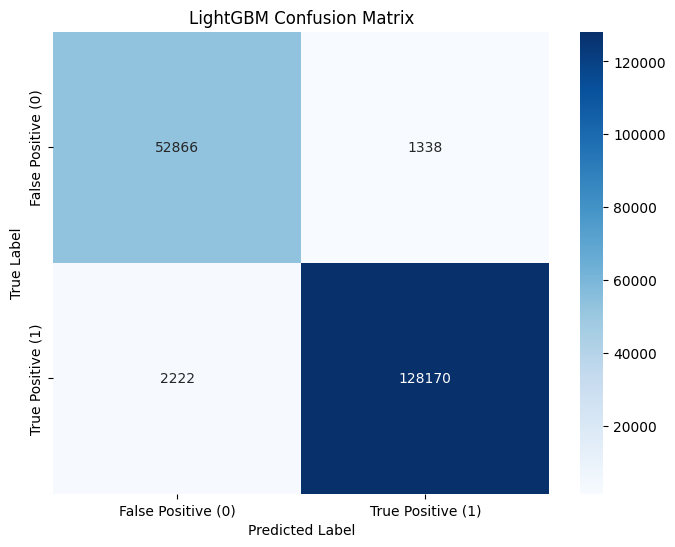


Feature Importances:
x_center      948
y_center      784
width         400
confidence    399
height        338
class_id      131
dtype: int32


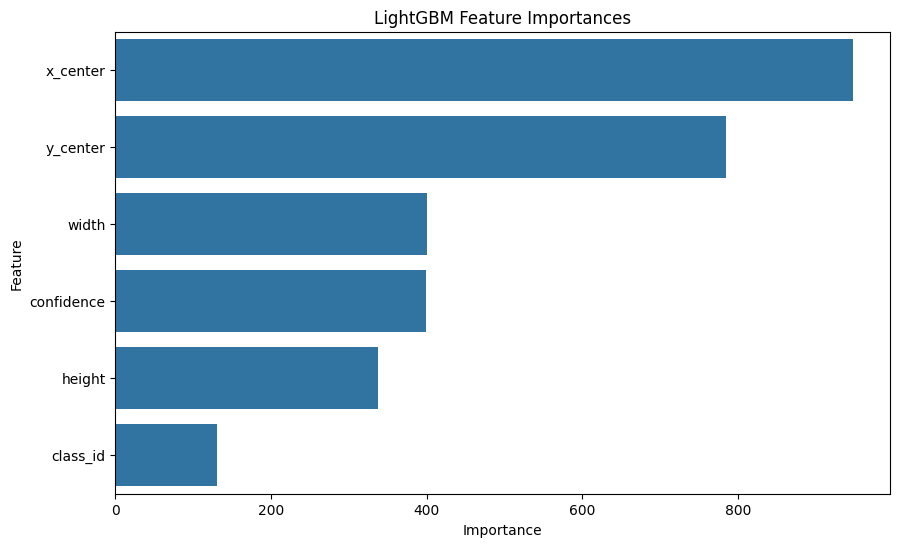

In [29]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 특징(Features) 및 타겟(Target) 변수 정의
if 'yolo_detections_df' in locals() and not yolo_detections_df.empty and 'is_correct_detection' in yolo_detections_df.columns:
    print("LightGBM 학습을 위한 특징 및 타겟 변수를 정의합니다...")

    features = ['class_id', 'x_center', 'y_center', 'width', 'height', 'confidence']

    target = 'is_correct_detection'

    X = yolo_detections_df[features]
    y = yolo_detections_df[target]

    print(f"사용된 특징 (X): {features}")
    print(f"타겟 변수 (y): {target}")
    print(f"X 데이터 형태: {X.shape}")
    print(f"y 데이터 형태: {y.shape}")

    # 학습 데이터와 테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print(f"\n데이터 분할 완료:")
    print(f"학습 데이터 (X_train): {X_train.shape}, 학습 타겟 (y_train): {y_train.shape}")
    print(f"테스트 데이터 (X_test): {X_test.shape}, 테스트 타겟 (y_test): {y_test.shape}")
    print(f"학습 데이터 타겟 분포:\n{y_train.value_counts(normalize=True)}")
    print(f"테스트 데이터 타겟 분포:\n{y_test.value_counts(normalize=True)}")


    # LightGBM 모델 학습
    print("\nLightGBM 모델 학습을 시작합니다...")

    lgbm_clf = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
    lgbm_clf.fit(X_train, y_train)
    print("LightGBM 모델 학습 완료.")

    # 모델 평가
    print("\nLightGBM 모델 평가를 시작합니다...")

    # 테스트 데이터로 예측 수행
    y_pred_lgbm = lgbm_clf.predict(X_test)
    y_pred_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1] # 클래스 1일 확률

    # 정확도
    accuracy = accuracy_score(y_test, y_pred_lgbm)
    print(f"\nAccuracy: {accuracy:.4f}")

    # 분류 리포트 (정밀도, 재현율, F1-점수 등)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lgbm, target_names=['오탐 (0)', '정탐 (1)']))

    # 혼동 행렬 (Confusion Matrix)
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_lgbm)
    print(cm)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False Positive (0)', 'True Positive (1)'], yticklabels=['False Positive (0)', 'True Positive (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('LightGBM Confusion Matrix')
    plt.show()

    # 특징 중요도 확인 (어떤 특징이 모델 판단에 중요했는지)
    print("\nFeature Importances:")
    feature_importances = pd.Series(lgbm_clf.feature_importances_, index=features).sort_values(ascending=False)
    print(feature_importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('LightGBM Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

else:
    print("오류: 'yolo_detections_df' DataFrame이 준비되지 않았거나 'is_correct_detection' 컬럼이 없습니다.")
    print("이전 단계의 코드를 실행하여 DataFrame을 준비해주세요.")

In [28]:
if 'lgbm_clf' not in locals() or \
   'X_test' not in locals() or \
   'y_test' not in locals():
    print("오류: 필요한 변수 중 일부가 현재 세션에 없습니다.")
    print("LightGBM 모델 학습 및 데이터 분할 코드를 먼저 실행하여 변수들을 준비해주세요.")
else:
    print("LightGBM을 사용하여 YOLO 테스트셋 예측 결과 필터링 및 성능 평가를 시작합니다...")

    # LightGBM 모델을 사용하여 X_test (YOLO 예측들의 특징)에 대해 예측합니다.
    lgbm_filter_predictions = lgbm_clf.predict(X_test)

    # LightGBM이 "정탐(1)"이라고 판단한 예측들만 식별합니다.
    indices_approved_by_lgbm = X_test[lgbm_filter_predictions == 1].index

    # LightGBM이 "정탐(1)"이라고 판단한 예측들의 실제 정답(y_test)을 가져옵니다.
    actual_labels_for_approved_detections = y_test.loc[indices_approved_by_lgbm]

    # LightGBM이 승인한 예측들 중 실제로 정탐이었던 비율 (정밀도)을 계산합니다.
    num_total_approved_by_lgbm = len(actual_labels_for_approved_detections)
    num_correctly_approved_by_lgbm = actual_labels_for_approved_detections.sum()

    if num_total_approved_by_lgbm > 0:
        precision_of_lgbm_filtered_detections = num_correctly_approved_by_lgbm / num_total_approved_by_lgbm
        print(f"\n--- LightGBM 필터링 후 예측 성능 ---")
        print(f"LightGBM이 '정탐'으로 판단한 YOLO 예측 개수: {num_total_approved_by_lgbm}")
        print(f"그 중에서 실제로 '정탐'이었던 YOLO 예측 개수: {num_correctly_approved_by_lgbm}")
        print(f"필터링된 예측의 정밀도 (Precision): {precision_of_lgbm_filtered_detections:.4f}")

        # 필터링된 예측들의 오탐률 계산
        # LightGBM이 '정탐'으로 판단했지만 실제로는 '오탐'이었던 경우의 수
        num_false_positives_after_lgbm_filter = num_total_approved_by_lgbm - num_correctly_approved_by_lgbm

        # LightGBM이 승인한 예측들 중에서 오탐의 비율
        fp_rate_in_approved_detections = num_false_positives_after_lgbm_filter / num_total_approved_by_lgbm
        print(f"\nLightGBM이 '정탐'으로 판단한 예측 중 실제 '오탐'이었던 개수: {num_false_positives_after_lgbm_filter}")
        print(f"필터링된 예측의 오탐 비율 (승인된 예측 중 오탐 비율): {fp_rate_in_approved_detections:.4f}")

    else:
        print("\nLightGBM이 '정탐'으로 판단한 예측이 하나도 없습니다.")

LightGBM을 사용하여 YOLO 테스트셋 예측 결과 필터링 및 성능 평가를 시작합니다...

--- LightGBM 필터링 후 예측 성능 ---
LightGBM이 '정탐'으로 판단한 YOLO 예측 개수: 129508
그 중에서 실제로 '정탐'이었던 YOLO 예측 개수: 128170
필터링된 예측의 정밀도 (Precision): 0.9897

LightGBM이 '정탐'으로 판단한 예측 중 실제 '오탐'이었던 개수: 1338
필터링된 예측의 오탐 비율 (승인된 예측 중 오탐 비율): 0.0103
